In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

import env
import acquire
import split_scale
import features
import prep

## Acquire and summarize data

In [2]:
#data for baseline model. Includes square feet, number of bedrooms and number of bathrooms.
df = acquire.wrangle_zillow()

#### Data for tax rate distribution

In [3]:
df_tax = acquire.zillow_tax()

#### Clean up of df_tax and acquiring county names based on fips field
from:https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697

In [4]:
df_tax = prep.tax_data_clean(df_tax)

#### Cleaning df data to only include selected features sqft, bedrooms, and bathrooms

In [5]:
df = prep.df_clean(df)

#### Basic statistical data for baseline model

In [6]:
df.describe()

,bathrooms,bedrooms,sqft,tax_value
count,15982.000000,15982.000000,15982.000000,1.598200e+04
mean,2.214992,3.252597,1836.581905,4.633691e+05
std,1.027066,0.950211,985.314844,6.435119e+05
min,1.000000,1.000000,320.000000,7.584000e+03
25%,2.000000,3.000000,1233.000000,1.817542e+05
50%,2.000000,3.000000,1592.000000,3.202605e+05
75%,3.000000,4.000000,2161.750000,5.287630e+05
max,20.000000,25.000000,26345.000000,1.912982e+07


#### Data dictionary
calculatedfinishedsquarefeet was used for sqft as it had the most consistent vales and fewest nulls. The few nulls that were left were excluded from the data as they were not significant enough in size to hurt our data. 

Additionally houses with zero bedroom or bathrooms were also exclude as these were determined to be eroneous with our dataset of single family residenial homes.

#### Distribution plots of 3 chosen baseline features

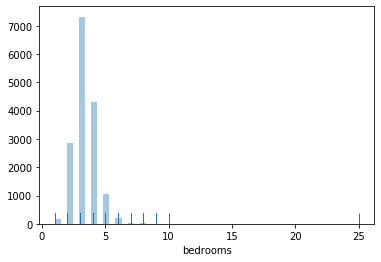

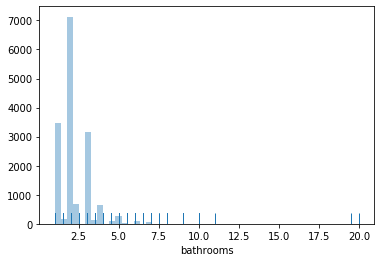

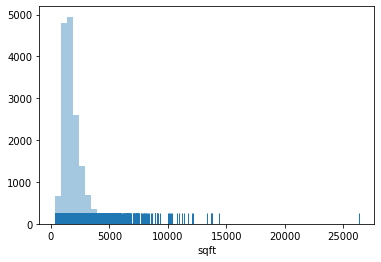

In [7]:
prep.distribution_plot(df)

#### Outliers and scaling

The plotted and statistical data showed that there are some extreme outliers in all three features. For this model I chose to leave 